# Subtração de fundo e segmentação de objetos

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.8 


In [2]:
fundo = cv2.imread("hall_robots.jpg")
fundo_rgb = cv2.cvtColor(fundo, cv2.COLOR_BGR2RGB)
fundo_cinza = cv2.cvtColor(fundo, cv2.COLOR_BGR2GRAY)

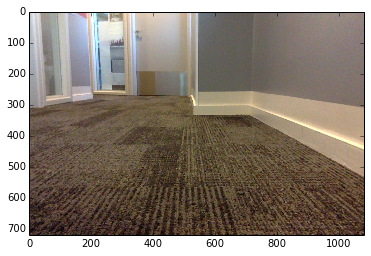

In [3]:
plt.imshow(fundo_rgb)

In [4]:
arquivos = ["hall_robots - {0}.jpg".format(str(i)) for i in range(1,27)]
arquivos

['hall_robots - 1.jpg',
 'hall_robots - 2.jpg',
 'hall_robots - 3.jpg',
 'hall_robots - 4.jpg',
 'hall_robots - 5.jpg',
 'hall_robots - 6.jpg',
 'hall_robots - 7.jpg',
 'hall_robots - 8.jpg',
 'hall_robots - 9.jpg',
 'hall_robots - 10.jpg',
 'hall_robots - 11.jpg',
 'hall_robots - 12.jpg',
 'hall_robots - 13.jpg',
 'hall_robots - 14.jpg',
 'hall_robots - 15.jpg',
 'hall_robots - 16.jpg',
 'hall_robots - 17.jpg',
 'hall_robots - 18.jpg',
 'hall_robots - 19.jpg',
 'hall_robots - 20.jpg',
 'hall_robots - 21.jpg',
 'hall_robots - 22.jpg',
 'hall_robots - 23.jpg',
 'hall_robots - 24.jpg',
 'hall_robots - 25.jpg',
 'hall_robots - 26.jpg']

In [5]:
frames = [cv2.imread("img/"+arquivo) for arquivo in arquivos]

In [6]:
frames_rgb = [cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) for frame in frames ]

In [7]:
frames_gray = [cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) for frame in frames ]

## Condições iniciais

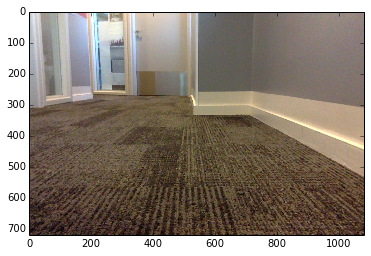

In [8]:
plt.imshow(frames_rgb[0])

## Condições posteriores

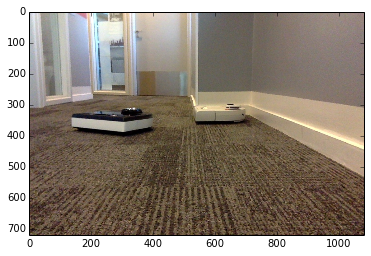

In [9]:
plt.imshow(frames_rgb[5])

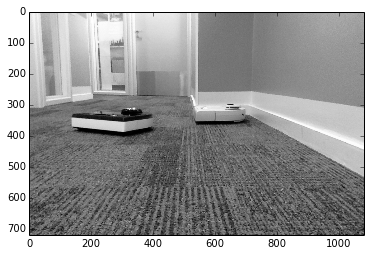

In [10]:
plt.imshow(frames_gray[5], cmap="Greys_r")

In [37]:
# Exemplo para um frame

fim = frames_gray[5]
inicio = frames_gray[0]

# Blur para eliminar ruído no chao
fimblur  = cv2.GaussianBlur(fim, (3,3), 0)
inicioblur = cv2.GaussianBlur(inicio, (3,3), 0)

# Calculamos a diferença frente-fundo e fundo-frente
diferenca = cv2.subtract(fimblur,  inicioblur)
diferenca2 = cv2.subtract(inicioblur,  fimblur)


In [45]:
# Achamos a maior diferença conjunta 
or_img = cv2.bitwise_or(diferenca, diferenca2)

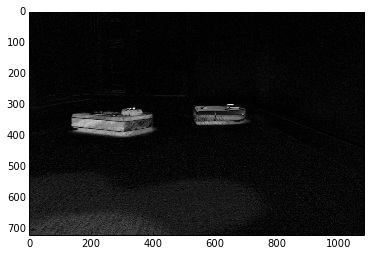

In [47]:
plt.imshow(or_img, cmap="Greys_r")

In [54]:
ret,limiar = cv2.threshold(or_img,np.percentile(or_img, 90),255,cv2.THRESH_BINARY)


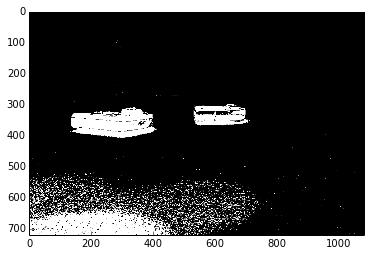

In [55]:
plt.imshow(limiar, cmap="Greys_r")